<a href="https://colab.research.google.com/github/allielabrecque4-debug/Machine-Learning-Labrecque/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Homework 5 <br>
Allie Labrecque 662017931

In [17]:
# Problem 1

from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from keras import applications
import numpy as np
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train.shape)
print(x_test.shape)

x_train = x_train/255
x_test = x_test/255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
model = Sequential()

# The first layer is a 2D convolutional layer with 64 filters, each of size (5, 5),and uses the ReLU activation function. T
model.add(Conv2D(64,(5,5),activation='relu',input_shape=(32,32,3)))

# The second layer is a max pooling layer of size (2, 2).
model.add(MaxPooling2D((2,2), strides=(2,2)))

# The third layer is another 2D convolutional layer with 32 filters, each of size (3, 3), and uses the ReLU activation function.
model.add(Conv2D(32,(3,3),activation='relu'))

# The fourth layer is another max pooling layer of size (2, 2).
model.add(MaxPooling2D((2,2), strides=(2,2)))

# The fifth layer is another 2D convolutional layer with 32 filters, each of size (3,3), and uses the ReLU activation function.
model.add(Conv2D(32,(3,3),activation='relu'))

# The sixth layer is a flattened layer which converts the output of the previous layer into a one-dimensional vector.
model.add(Flatten())

# The seventh layer is a dense layer with 64 neurons and uses the ReLU activation function.
model.add(Dense(64,activation='relu'))

# The eighth and final layer produces estimated probabilities to classify the CIFAR-10 classes.
model.add(Dense(10,activation='softmax'))

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,058 (258.04 KB)

 Trainable params: 66,058 (258.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1527 - loss: 2.2173 - val_accuracy: 0.3128 - val_loss: 1.9106
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3205 - loss: 1.8722 - val_accuracy: 0.3678 - val_loss: 1.7718
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3549 - loss: 1.7854 - val_accuracy: 0.3700 - val_loss: 1.7447
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3717 - loss: 1.7322 - val_accuracy: 0.3902 - val_loss: 1.6913
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3974 - loss: 1.6800 - val_accuracy: 0.4129 - val_loss: 1.6361
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4151 - loss: 1.6323 - val_accuracy: 0.4295 - val_loss: 1.6215
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4308 - loss: 1.5902 - val_accuracy: 0.4244 - val_loss: 1.6373
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4392 - loss: 1.5800 - val_accuracy: 0

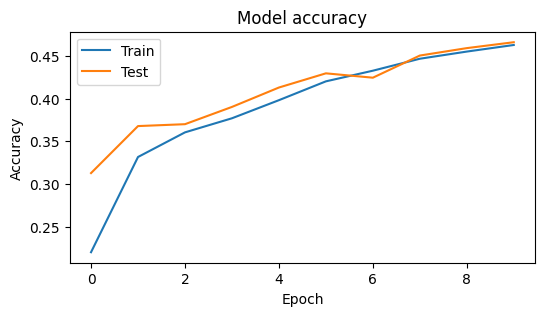

In [19]:
# Plot training & validation accuracy values
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
# PROBLEM 2
from sklearn.datasets import load_breast_cancer
import numpy as np

breast_cancer_data = load_breast_cancer()

# Find the indices of the desired features
feature_names = breast_cancer_data.feature_names
feature_indices = [np.where(feature_names == 'worst compactness')[0][0],
                   np.where(feature_names == 'worst concavity')[0][0],
                   np.where(feature_names == 'worst area')[0][0]]

# Extract the selected features
X = breast_cancer_data.data[:, feature_indices]

# Extract the target variable
y = breast_cancer_data.target

print("Shape of selected features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of selected features (X): (569, 3)
Shape of target variable (y): (569,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 3)
Shape of X_test: (114, 3)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [11]:
from sklearn.svm import SVC

# Instantiate an SVC object with a linear kernel
svm_model = SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
from sklearn.metrics import accuracy_score

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the linear SVM model:", accuracy)

Accuracy of the linear SVM model: 0.9649122807017544


In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate an SVC object with an RBF kernel and C=2
svm_model_rbf = SVC(kernel='rbf', C=2)

# Train the SVM model
svm_model_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rbf = svm_model_rbf.predict(X_test)

# Calculate the accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy of the SVM model with RBF kernel (C=2):", accuracy_rbf)

Accuracy of the SVM model with RBF kernel (C=2): 0.9473684210526315




End of document

